### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

#### Loading Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Utility Functions

In [2]:
def df_summary(df):
    summary = ny.describe()
    null_count = ny.isnull().sum()
    summary.loc['null_count'] = null_count
    return summary

def get_range_hour(x):
    hour = x.hour
    for i in range(0, 24, 3):
        if i <= hour < i + 3:
            return f'{i}-{i + 2}'
    return None


def get_range_hour_idx(x):
    hour = x.hour
    for i in range(0, 24, 3):
        if i <= hour < i + 3:
            return i
    return None

def get_range_age(x):
    if x > 80:
        return '>80'
    for i in range(0, 81, 10):
        if i <= x < i + 10:
            return f'{i}-{i + 9}'
    return None

#### Loading CSV  

I load the CSV files into their respective dataframes.

In [3]:
ny = pd.read_csv('new-york-city.csv')
wash = pd.read_csv('washington.csv')
chi = pd.read_csv('chicago.csv')

#### Data Analysis and Schema  

I perform a preliminary analysis of the 3 initial datasets using the summary function.

##### New York

In [4]:
ny_summary = df_summary(ny)
ny_summary

,Unnamed: 0,Trip Duration,Birth Year
count,3.000000e+05,3.000000e+05,271780.000000
mean,3.407026e+06,8.996842e+02,1978.254309
std,1.965617e+06,5.710016e+03,11.848045
min,3.300000e+01,6.100000e+01,1885.000000
25%,1.707416e+06,3.680000e+02,1970.000000
50%,3.405756e+06,6.090000e+02,1981.000000
75%,5.108762e+06,1.054000e+03,1988.000000
max,6.816152e+06,2.155775e+06,2001.000000
null_count,0.000000e+00,0.000000e+00,28220.000000


In [5]:
ny.head(5)

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998.0
1,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981.0
2,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987.0
3,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986.0
4,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992.0


##### Washington

In [6]:
wash_summary = df_summary(wash)
wash_summary

,Unnamed: 0,Trip Duration,Birth Year
count,3.000000e+05,3.000000e+05,271780.000000
mean,3.407026e+06,8.996842e+02,1978.254309
std,1.965617e+06,5.710016e+03,11.848045
min,3.300000e+01,6.100000e+01,1885.000000
25%,1.707416e+06,3.680000e+02,1970.000000
50%,3.405756e+06,6.090000e+02,1981.000000
75%,5.108762e+06,1.054000e+03,1988.000000
max,6.816152e+06,2.155775e+06,2001.000000
null_count,0.000000e+00,0.000000e+00,28220.000000


In [7]:
wash.head(5)

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type
0,1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
1,482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
2,1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
3,665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
4,1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber


##### Chicago

In [8]:
chi_summary = df_summary(chi)
chi_summary

,Unnamed: 0,Trip Duration,Birth Year
count,3.000000e+05,3.000000e+05,271780.000000
mean,3.407026e+06,8.996842e+02,1978.254309
std,1.965617e+06,5.710016e+03,11.848045
min,3.300000e+01,6.100000e+01,1885.000000
25%,1.707416e+06,3.680000e+02,1970.000000
50%,3.405756e+06,6.090000e+02,1981.000000
75%,5.108762e+06,1.054000e+03,1988.000000
max,6.816152e+06,2.155775e+06,2001.000000
null_count,0.000000e+00,0.000000e+00,28220.000000


In [9]:
chi.head(5)

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992.0
1,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0
2,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981.0
3,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986.0
4,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975.0


From this analysis, the following points are evident:
- New York: The Birth.Year variable has 28,220 missing values.
- Chicago: The Birth.Year variable has 61,019 missing values, which represent a significant percentage of the total.
- Washington: There is a complete lack of information on Gender and Birth.Year, limiting the analysis to only trip and station data.

#### Data Cleaning and Final Dataset Construction


Below is the code I will use to merge the 3 dataframes, standardizing and homogenizing the fields to obtain a final dataset that includes all essential information.

##### New York cleaning and standardizzation

In [10]:
ny.columns.values[0] = "Trip.id"
ny["Birth Year"] = ny["Birth Year"].astype(float)
ny["Start Time"] = pd.to_datetime(ny["Start Time"])
ny["End Time"] = pd.to_datetime(ny["End Time"])
ny["City"] = 'New York'
ny.head(5)

,Trip.id,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,City
0,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998.0,New York
1,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981.0,New York
2,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987.0,New York
3,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986.0,New York
4,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992.0,New York


##### Washington cleaning and standardizzation

In [11]:
wash.columns.values[0] = "Trip.id"
#wash["Birth Year"] = wash["Birth Year"].astype(float)
wash["Start Time"] = pd.to_datetime(wash["Start Time"])
wash["End Time"] = pd.to_datetime(wash["End Time"])
wash["City"] = 'Washington'
wash.insert(7,'Gender',None)
wash.insert(8,'Birth Year',None)
wash.head(5)

,Trip.id,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,City
0,1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,None,None,Washington
1,482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,None,None,Washington
2,1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,None,None,Washington
3,665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,None,None,Washington
4,1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,None,None,Washington


##### Chicago cleaning and standardizzation

In [12]:
chi.columns.values[0] = "Trip.id"
chi["Birth Year"] = chi["Birth Year"].astype(float)
chi["Start Time"] = pd.to_datetime(chi["Start Time"])
chi["End Time"] = pd.to_datetime(chi["End Time"])
chi["City"] = 'New York'
chi.head(5)

,Trip.id,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,City
0,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992.0,New York
1,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0,New York
2,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981.0,New York
3,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986.0,New York
4,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975.0,New York


In [13]:
final_ds = pd.concat([ny,wash,chi], axis=0, ignore_index=True)
df_summary(final_ds)

/tmp/ipykernel_1162/102363612.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_ds = pd.concat([ny,wash,chi], axis=0, ignore_index=True)


,Trip.id,Start Time,End Time,Trip Duration,Birth Year
count,3.000000e+05,300000,300000,3.000000e+05,271780.000000
mean,3.407026e+06,2017-04-18 23:57:55.156410624,2017-04-19 00:12:55.339599616,8.996842e+02,1978.254309
min,3.300000e+01,2017-01-01 00:13:34,2017-01-01 00:27:31,6.100000e+01,1885.000000
25%,1.707416e+06,2017-03-07 17:30:53.500000,2017-03-07 17:41:34.249999872,3.680000e+02,1970.000000
50%,3.405756e+06,2017-04-28 08:23:16,2017-04-28 08:35:04.500000,6.090000e+02,1981.000000
75%,5.108762e+06,2017-06-01 12:25:53.750000128,2017-06-01 12:42:50.500000,1.054000e+03,1988.000000
max,6.816152e+06,2017-06-30 23:52:44,2017-07-08 14:30:26,2.155775e+06,2001.000000
std,1.965617e+06,NaN,NaN,5.710016e+03,11.848045
null_count,0.000000e+00,0,0,0.000000e+00,28220.000000


### Question 1

By dividing the day into 3-hour time slots, which time slot has the most trips?

In [14]:
q1_ds = final_ds.copy()
q1_ds['Start Range Hour'] = q1_ds['Start Time'].apply(get_range_hour)
q1_ds['Index Range Hour'] = q1_ds['Start Time'].apply(get_range_hour_idx)
q1_ds = q1_ds[['Index Range Hour','Trip.id','Start Range Hour']].copy()
q1_ds.dropna(inplace=True)
q1_ds_group = q1_ds.groupby(['Index Range Hour','Start Range Hour']).count().sort_values(by='Index Range Hour').copy()
q1_ds_group

,,Trip.id
Index Range Hour,Start Range Hour,
0,0-2,31861
3,3-5,56443
6,6-8,180982
9,9-11,140415
12,12-14,133977
15,15-17,184066
18,18-20,131028
21,21-23,41228


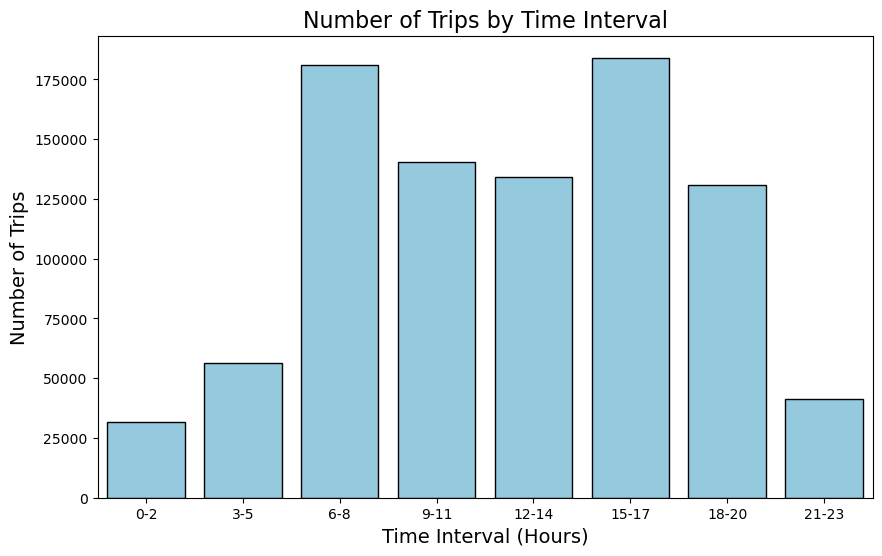

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Start Range Hour', y='Trip.id', data=q1_ds_group, color='skyblue', edgecolor='black')
plt.title("Number of Trips by Time Interval", fontsize=16)
plt.xlabel("Time Interval (Hours)", fontsize=14)
plt.ylabel("Number of Trips", fontsize=14)
sns.set_theme(style="whitegrid")
plt.show()



The two time slots with peaks on weekdays are:
- 6 AM to 9 AM: 180,982 trips.
- 3 PM to 6 PM: 184,066 trips.
The "M" shape of this graph is common in the automotive field as these time slots indicate travel related to work commitments.

In [16]:
q2_ds = final_ds.copy()
q2_ds = q2_ds[['Trip.id','Start Time']].dropna()
q2_ds['Start Date'] = q2_ds['Start Time'].dt.date
q2_ds['Day Type'] = q2_ds['Start Time'].dt.weekday.apply(lambda x:'weekends' if x > 5 else 'workdays')
q2_ds_group = q2_ds[['Start Date','Day Type','Trip.id']].groupby(['Start Date','Day Type']).count().groupby(['Day Type']).mean()
q2_ds_group = q2_ds_group
q2_ds_group

,Trip.id
Day Type,
weekends,4403.923077
workdays,5067.729032


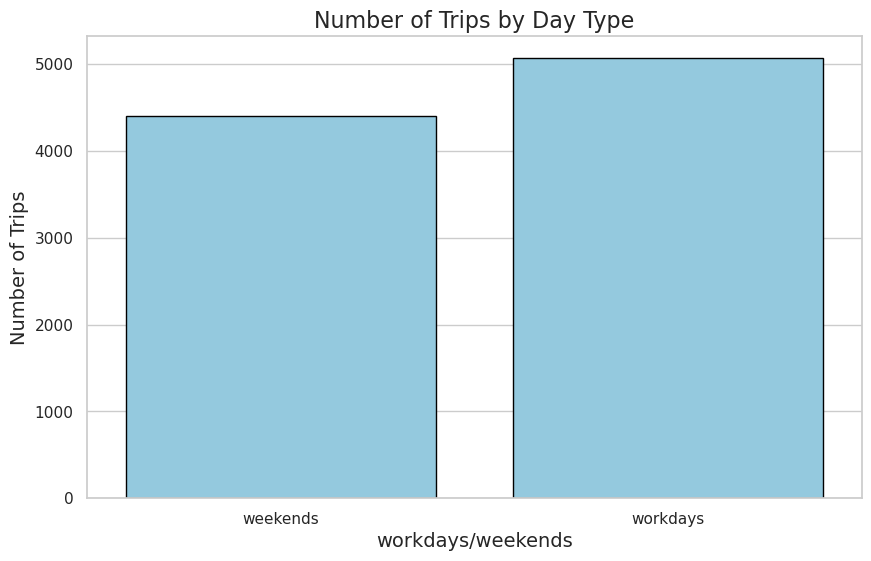

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Day Type', y='Trip.id', data=q2_ds_group, color='skyblue', edgecolor='black')
plt.title("Number of Trips by Day Type", fontsize=16)
plt.xlabel("workdays/weekends", fontsize=14)
plt.ylabel("Number of Trips", fontsize=14)
sns.set_theme(style="whitegrid")
plt.show()

As evidenced by the graph, the average volume of trips per day varies between workdays and weekends. On weekends, people tend to take fewer trips compared to workdays.

### Question 3

Based on the available data, where is the driver target concentrated in terms of age group and gender?

In [18]:
q3_ds = final_ds.copy()
q3_ds = q3_ds[['Gender','Birth Year','Start Time']]
q3_ds.dropna(inplace=True)
q3_ds['Birth Year'] = q3_ds['Birth Year'].astype(int)
q3_ds['Age'] = q3_ds['Start Time'].dt.year - q3_ds['Birth Year']
q3_ds['Age Range'] = q3_ds['Age'].apply(get_range_age)
q3_ds.drop(columns=['Birth Year','Start Time'],inplace=True)
q3_ds_group = q3_ds.groupby(['Age Range','Gender']).count()
q3_ds_group = q3_ds_group.reset_index()
q3_ds_pivot = q3_ds_group.pivot(index='Age Range', columns='Gender', values='Age').fillna(0)
q3_ds_pivot

Gender,Female,Male
Age Range,,
0-9,0.0,6.0
10-19,737.0,2043.0
20-29,42892.0,105198.0
30-39,42257.0,134398.0
40-49,18540.0,74057.0
50-59,14782.0,49049.0
60-69,4833.0,17898.0
70-79,438.0,2258.0
80-89,6.0,8.0


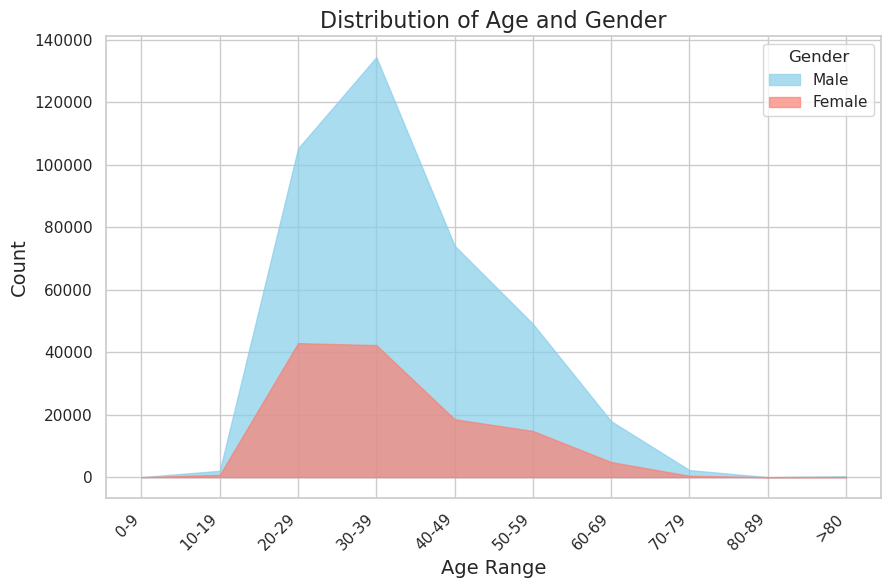

In [19]:
plt.figure(figsize=(10, 6))
plt.fill_between(q3_ds_pivot.index, q3_ds_pivot['Male'], alpha=0.7, label='Male', color='skyblue')
plt.fill_between(q3_ds_pivot.index, q3_ds_pivot['Female'], alpha=0.7, label='Female', color='salmon')
plt.title("Distribution of Age and Gender", fontsize=16)
plt.xlabel("Age Range", fontsize=14)
plt.ylabel("Count", fontsize=14)
sns.set_theme(style="whitegrid")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()

The graphs show that the primary target of our users is males aged between 30 and 39 years.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
jupyter nbconvert --to html Explore_bikeshare_data.ipynb

In [ ]:
wkhtmltopdf Explore_bikeshare_data.html Explore_bikeshare_data.pdf